fatima
# AI-304

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np


In [3]:
df=pd.read_csv("/content/lab_vehicle.csv")
df.head()

,COMPACTNESS,CIRCULARITY,'DISTANCE CIRCULARITY','RADIUS RATIO','PR.AXIS ASPECT RATIO','MAX.LENGTH ASPECT RATIO','SCATTER RATIO',ELONGATEDNESS,'PR.AXIS RECTANGULARITY','MAX.LENGTH RECTANGULARITY','SCALED VARIANCE_MAJOR','SCALED VARIANCE_MINOR','SCALED RADIUS OF GYRATION','SKEWNESS ABOUT_MAJOR','SKEWNESS ABOUT_MINOR','KURTOSIS ABOUT_MAJOR','KURTOSIS ABOUT_MINOR','HOLLOWS RATIO'
0,95,48,83,178,72,10,162,42,20,159,176,379,184,70,6,16,187,197
1,91,41,84,141,57,9,149,45,19,143,170,330,158,72,9,14,189,199
2,104,50,106,209,66,10,207,32,23,158,223,635,220,73,14,9,188,196
3,93,41,82,159,63,9,144,46,19,143,160,309,127,63,6,10,199,207
4,85,44,70,205,103,52,149,45,19,144,241,325,188,127,9,11,180,183


In [4]:
df.isna().sum()

,0
COMPACTNESS,0
CIRCULARITY,0
'DISTANCE CIRCULARITY',0
'RADIUS RATIO',0
'PR.AXIS ASPECT RATIO',0
'MAX.LENGTH ASPECT RATIO',0
'SCATTER RATIO',0
ELONGATEDNESS,0
'PR.AXIS RECTANGULARITY',0
'MAX.LENGTH RECTANGULARITY',0


In [5]:
df.corr()

,COMPACTNESS,CIRCULARITY,'DISTANCE CIRCULARITY','RADIUS RATIO','PR.AXIS ASPECT RATIO','MAX.LENGTH ASPECT RATIO','SCATTER RATIO',ELONGATEDNESS,'PR.AXIS RECTANGULARITY','MAX.LENGTH RECTANGULARITY','SCALED VARIANCE_MAJOR','SCALED VARIANCE_MINOR','SCALED RADIUS OF GYRATION','SKEWNESS ABOUT_MAJOR','SKEWNESS ABOUT_MINOR','KURTOSIS ABOUT_MAJOR','KURTOSIS ABOUT_MINOR','HOLLOWS RATIO'
COMPACTNESS,1.000000,0.692869,0.792444,0.691659,0.093222,0.148249,0.813003,-0.788647,0.813437,0.676143,0.764415,0.818632,0.585347,-0.252984,0.233693,0.156779,0.297780,0.365552
CIRCULARITY,0.692869,1.000000,0.798492,0.622778,0.149692,0.247467,0.860367,-0.828755,0.857925,0.965776,0.808496,0.852679,0.936080,0.058669,0.148433,-0.015482,-0.113047,0.038677
'DISTANCE CIRCULARITY',0.792444,0.798492,1.000000,0.771644,0.161529,0.264309,0.907280,-0.912307,0.895326,0.774524,0.864432,0.889661,0.705818,-0.231660,0.116478,0.264522,0.147980,0.335453
'RADIUS RATIO',0.691659,0.622778,0.771644,1.000000,0.665407,0.448048,0.738460,-0.792557,0.711497,0.570154,0.797588,0.725781,0.539069,-0.182412,0.050534,0.174299,0.380757,0.469278
'PR.AXIS ASPECT RATIO',0.093222,0.149692,0.161529,0.665407,1.000000,0.648096,0.106064,-0.185086,0.079982,0.129168,0.274705,0.092182,0.124408,0.152304,-0.056807,-0.034180,0.238195,0.267381
'MAX.LENGTH ASPECT RATIO',0.148249,0.247467,0.264309,0.448048,0.648096,1.000000,0.166769,-0.180044,0.161861,0.305943,0.319430,0.144606,0.189791,0.294548,0.015218,0.043379,-0.027317,0.143919
'SCATTER RATIO',0.813003,0.860367,0.907280,0.738460,0.106064,0.166769,1.000000,-0.973385,0.992088,0.810648,0.951862,0.996318,0.800932,-0.028618,0.074347,0.210706,0.004053,0.119950
ELONGATEDNESS,-0.788647,-0.828755,-0.912307,-0.792557,-0.185086,-0.180044,-0.973385,1.000000,-0.950512,-0.775531,-0.938392,-0.956522,-0.766146,0.104875,-0.053346,-0.185189,-0.112046,-0.216725
'PR.AXIS RECTANGULARITY',0.813437,0.857925,0.895326,0.711497,0.079982,0.161861,0.992088,-0.950512,1.000000,0.813305,0.938266,0.992346,0.798282,-0.016333,0.082346,0.213088,-0.022056,0.098519
'MAX.LENGTH RECTANGULARITY',0.676143,0.965776,0.774524,0.570154,0.129168,0.305943,0.810648,-0.775531,0.813305,1.000000,0.747152,0.798071,0.866479,0.040339,0.137473,0.001183,-0.107718,0.076770


In [6]:
df.columns

Index(['COMPACTNESS', 'CIRCULARITY', ''DISTANCE CIRCULARITY'',
       ''RADIUS RATIO'', ''PR.AXIS ASPECT RATIO'', ''MAX.LENGTH ASPECT RATIO'',
       ''SCATTER RATIO'', 'ELONGATEDNESS', ''PR.AXIS RECTANGULARITY'',
       ''MAX.LENGTH RECTANGULARITY'', ''SCALED VARIANCE_MAJOR'',
       ''SCALED VARIANCE_MINOR'', ''SCALED RADIUS OF GYRATION'',
       ''SKEWNESS ABOUT_MAJOR'', ''SKEWNESS ABOUT_MINOR'',
       ''KURTOSIS ABOUT_MAJOR'', ''KURTOSIS ABOUT_MINOR'', ''HOLLOWS RATIO''],
      dtype='object')

In [7]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in column '{column}': {unique_values}")

Unique values in column 'COMPACTNESS': [ 95  91 104  93  85 107  97  90  86  88  89  94  96  99 101  84  87  83
 102  80 100  82 106  81 119  78  92  98 103  77  73  79 110 108 109 111
 105 112 116 113 117 115  76 114]
Unique values in column 'CIRCULARITY': [48 41 50 44 57 43 34 36 46 42 49 55 54 56 47 37 39 53 45 38 35 40 59 52
 51 58 33]
Unique values in column ''DISTANCE CIRCULARITY'': [ 83  84 106  82  70  73  66  62  98  74  85  79 103  51  77 100  75  53
  64 105  80  54  63 107  90  72  86  68 104  87  76  81  71 101  96  78
 108  91  89  94  92  60  57  65  50  88 109  95  58  69  47  40  59 110
  93 102 112  61  42  49  44  52  55]
Unique values in column ''RADIUS RATIO'': [178 141 209 159 205 172 173 157 140 197 143 136 171 144 203 201 109 186
 215 153 121 148 219 154 119 193 129 160 151 222 177 118 306 176 169 214
 105 137 183 220 145 133 122 147 115 174 228 175 185 195 221 212 135 120
 156 125 164 161 227 191 111 170 208 113 127 188 180 116 158 162 211 152
 124 252 150 130 

In [8]:
df

,COMPACTNESS,CIRCULARITY,'DISTANCE CIRCULARITY','RADIUS RATIO','PR.AXIS ASPECT RATIO','MAX.LENGTH ASPECT RATIO','SCATTER RATIO',ELONGATEDNESS,'PR.AXIS RECTANGULARITY','MAX.LENGTH RECTANGULARITY','SCALED VARIANCE_MAJOR','SCALED VARIANCE_MINOR','SCALED RADIUS OF GYRATION','SKEWNESS ABOUT_MAJOR','SKEWNESS ABOUT_MINOR','KURTOSIS ABOUT_MAJOR','KURTOSIS ABOUT_MINOR','HOLLOWS RATIO'
0,95,48,83,178,72,10,162,42,20,159,176,379,184,70,6,16,187,197
1,91,41,84,141,57,9,149,45,19,143,170,330,158,72,9,14,189,199
2,104,50,106,209,66,10,207,32,23,158,223,635,220,73,14,9,188,196
3,93,41,82,159,63,9,144,46,19,143,160,309,127,63,6,10,199,207
4,85,44,70,205,103,52,149,45,19,144,241,325,188,127,9,11,180,183
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841,93,39,87,183,64,8,169,40,20,134,200,422,149,72,7,25,188,195
842,89,46,84,163,66,11,159,43,20,159,173,368,176,72,1,20,186,197
843,106,54,101,222,67,12,222,30,25,173,228,721,200,70,3,4,187,201
844,86,36,78,146,58,7,135,50,18,124,155,270,148,66,0,25,190,195


In [9]:
df = df.apply(pd.to_numeric, errors='coerce')

In [10]:
df

,COMPACTNESS,CIRCULARITY,'DISTANCE CIRCULARITY','RADIUS RATIO','PR.AXIS ASPECT RATIO','MAX.LENGTH ASPECT RATIO','SCATTER RATIO',ELONGATEDNESS,'PR.AXIS RECTANGULARITY','MAX.LENGTH RECTANGULARITY','SCALED VARIANCE_MAJOR','SCALED VARIANCE_MINOR','SCALED RADIUS OF GYRATION','SKEWNESS ABOUT_MAJOR','SKEWNESS ABOUT_MINOR','KURTOSIS ABOUT_MAJOR','KURTOSIS ABOUT_MINOR','HOLLOWS RATIO'
0,95,48,83,178,72,10,162,42,20,159,176,379,184,70,6,16,187,197
1,91,41,84,141,57,9,149,45,19,143,170,330,158,72,9,14,189,199
2,104,50,106,209,66,10,207,32,23,158,223,635,220,73,14,9,188,196
3,93,41,82,159,63,9,144,46,19,143,160,309,127,63,6,10,199,207
4,85,44,70,205,103,52,149,45,19,144,241,325,188,127,9,11,180,183
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841,93,39,87,183,64,8,169,40,20,134,200,422,149,72,7,25,188,195
842,89,46,84,163,66,11,159,43,20,159,173,368,176,72,1,20,186,197
843,106,54,101,222,67,12,222,30,25,173,228,721,200,70,3,4,187,201
844,86,36,78,146,58,7,135,50,18,124,155,270,148,66,0,25,190,195


In [15]:
# Feature selection: Dropping columns that may be non-numeric or not relevant
X = df.values


# FROM SCRATCH

Iteration 1
Iteration 2
Iteration 3
Iteration 4
Iteration 5
Iteration 6
Iteration 7
Iteration 8
Iteration 9


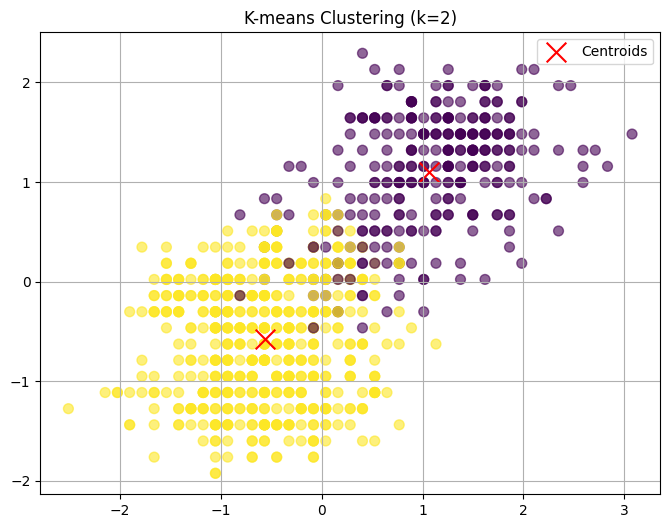

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 1: Initialize Centroids+
def initialize_centroids(X, k):
    random_idx = np.random.choice(X.shape[0], k, replace=False)
    centroids = X[random_idx]
    return centroids

# Step 2: Calculate Euclidean Distance
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

# Step 3: K-means from Scratch
def kmeans(X, k, max_iters=100, tolerance=1e-4):
    centroids = initialize_centroids(X, k)
    for i in range(max_iters):
        # Step 4: Assign points to nearest centroid
        labels = np.array([np.argmin([euclidean_distance(x, c) for c in centroids]) for x in X])

        # Step 5: Recompute centroids
        new_centroids = np.array([X[labels == j].mean(axis=0) for j in range(k)])
        print(f"Iteration {i + 1}")

        # Step 6: Check for convergence (if centroids don't change significantly)
        if np.all(np.abs(new_centroids - centroids) < tolerance):
            break

        centroids = new_centroids

    return centroids, labels


k = 2
centroids, labels = kmeans(X_scaled, k)

# Plot the result (assuming 2D data for visualization)
plt.figure(figsize=(8,6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis', s=50, alpha=0.6)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=200, label='Centroids')
plt.title('K-means Clustering (k=2)')

plt.legend()
plt.grid(True)
plt.show()


In [17]:
import numpy as np
from sklearn.metrics import pairwise_distances

# Function to calculate the Silhouette Score
def silhouette_score(X, labels):
    n_samples = X.shape[0]
    score = 0.0

    # Calculate pairwise distances between all points
    dist_matrix = pairwise_distances(X)

    # Calculate the silhouette score for each sample
    for i in range(n_samples):
        # a(i) = average distance from point i to all other points in the same cluster
        same_cluster_mask = (labels == labels[i])
        a_i = np.mean(dist_matrix[i, same_cluster_mask] if same_cluster_mask.sum() > 1 else [0])

        # b(i) = minimum average distance from point i to all other points in other clusters
        other_clusters_mask = ~same_cluster_mask
        cluster_distances = []

        # Calculate the distance to each other cluster
        for label in np.unique(labels):
            if label != labels[i]:
                other_cluster_points = dist_matrix[i, labels == label]
                cluster_distances.append(np.mean(other_cluster_points))

        b_i = min(cluster_distances) if cluster_distances else 0

        # Silhouette score for the point i
        score += (b_i - a_i) / max(a_i, b_i) if max(a_i, b_i) > 0 else 0

    return score / n_samples

# Calculate the Silhouette Score for the clustering result
sil_score = silhouette_score(X_scaled, labels)
print(f"Silhouette Score: {sil_score}")


Silhouette Score: 0.3753695269744908


# for k=4

Iteration 1
Iteration 2
Iteration 3
Iteration 4
Iteration 5
Iteration 6


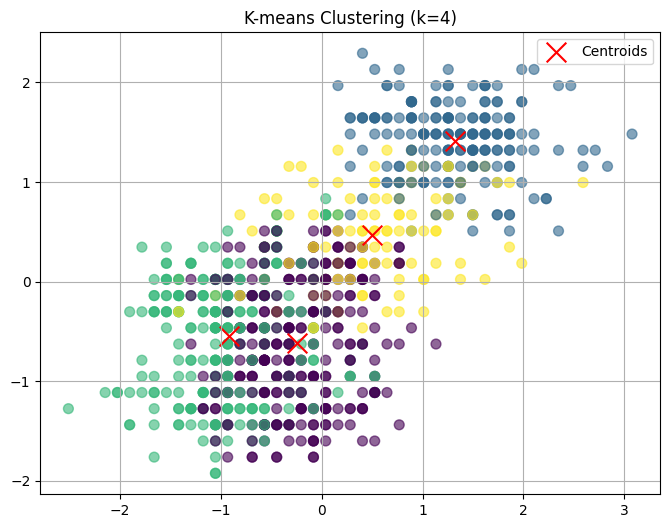

In [18]:
k = 4
centroids, labels = kmeans(X_scaled, k)

# Plot the result (assuming 2D data for visualization)
plt.figure(figsize=(8,6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis', s=50, alpha=0.6)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=200, label='Centroids')
plt.title('K-means Clustering (k=4)')

plt.legend()
plt.grid(True)
plt.show()

In [ ]:
labels

array([0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,